In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# time 
import time

%matplotlib inline

Accelerometer signal at 200 Hz

In [41]:
df = pd.read_csv('Raw Data.csv', header=None)

In [42]:
df.head()

,0,1,2,3,4
0,0.042064,0.000000,0.000000,0.000000,0.000000
1,0.047109,0.085081,-0.024327,0.027637,0.092706
2,0.052154,0.119086,-0.066181,0.076060,0.156033
3,0.057199,0.218725,-0.037556,0.332028,0.399367
4,0.062245,0.213444,-0.074447,0.388505,0.449485


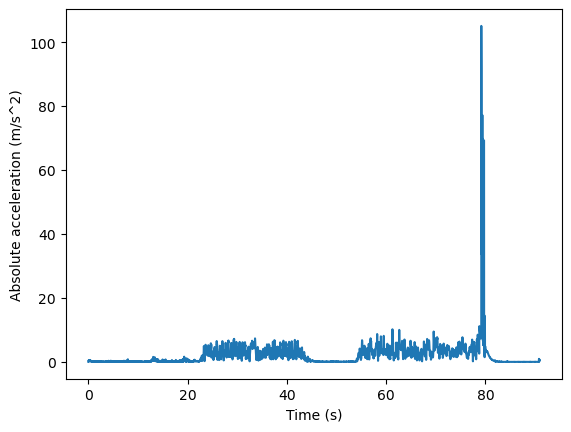

In [45]:
a = df[4].values
t = df[0].values

plt.plot(t,a)
plt.xlabel('Time (s)')
plt.ylabel('Absolute acceleration (m/s^2)')
plt.show()
    

In [70]:
# import FuncAnimation
from matplotlib import animation

MovieWriter ffmpeg unavailable; using Pillow instead.


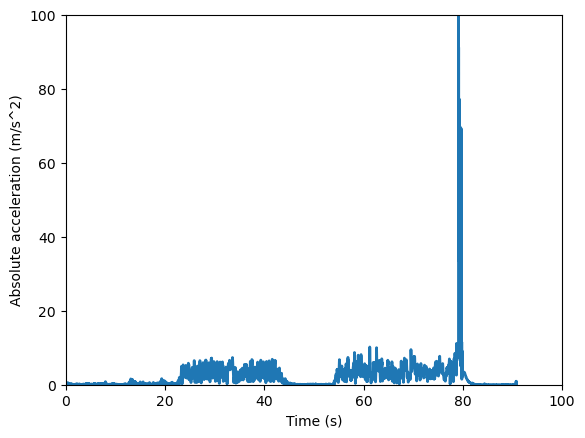

In [91]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0,100))
line, = ax.plot([], [], lw=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Absolute acceleration (m/s^2)')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    data = pd.read_csv('Raw Data.csv', header=None)
    y = data[4].values[:100*i]
    t = data[0].values[:100*i]
    line.set_data(t, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=900, interval=1, blit=True)

# save the animation as an gif
anim.save('acceleration.gif', fps=10)

In [84]:
# function that computes the standard deviation of every 200 data points
def std_deviation(data):
    std = []
    for i in range(0, len(data), 200):
        std.append(np.std(data[i:i+200]))
    return std


MovieWriter ffmpeg unavailable; using Pillow instead.


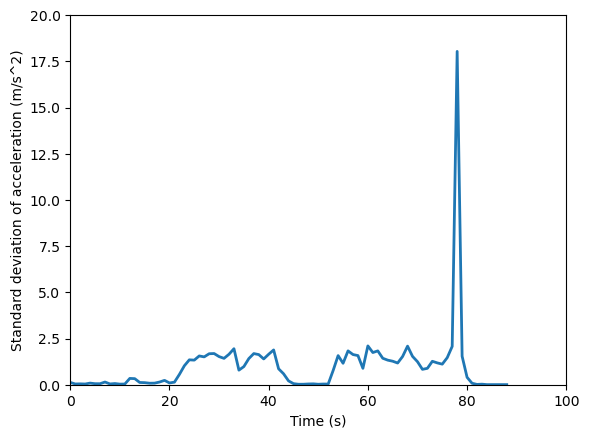

In [90]:
data = pd.read_csv('Raw Data.csv', header=None)
a = data[4].values
std = std_deviation(a)
time_values = range(0, len(std))

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0,20))
line, = ax.plot([], [], lw=2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Standard deviation of acceleration (m/s^2)')


# animation function.  This is called sequentially
def animate(i):
    y = std[:i]
    t = time_values[:i]
    line.set_data(t, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=1, blit=True)

# save the animation as an gif
anim.save('standard_deviation.gif', fps=1)


In [32]:
# Using readlines()
file1 = open('Raw Data.csv', 'r')
Lines = file1.readlines()

time_values = []
state_values = []
acc = []

  
count = 0
state = 0 

# Strips the newline character
for line in Lines:
    count += 1
    
    time_values.append(float(line.split(',')[0]))
    acc.append(float(line.split(',')[4]))

    if count%200 == 0:
        
        # compute standard deviation of last 200 data points
        std = np.std(acc[-200:])

        if std < 0.5 and (state == 1 or state == 2):
            state = 0
            print('User at rest. State ', 0)
        
        elif std > 1.5 and (std < 20 and state == 0 or state == 2):
            state = 1
            print('User walking. State ', 1)
        
        elif std > 10 and (state == 1 or state == 0):
            state = 2

            print('')
            print('Fall detected at time: ', np.round(time_values[-1],2))
            print('Standard deviation: ', np.round(std,2))
            print('')

            # ask user if the person has fallen
            ans = input('Do you need asistance? (y/n): ')
            if ans == 'n':
                print('Thanks God!')
                print('')
            
            else:
                print('Calling 911...')
                print('')

        state_values.append(state)

    # rest for 0.1 seconds
    time.sleep(0.005)


User walking. State  1
User at rest. State  0
User walking. State  1

Fall detected at time:  79.75
Standard deviation:  18.04

Calling 911...

User walking. State  1
User at rest. State  0


MovieWriter ffmpeg unavailable; using Pillow instead.


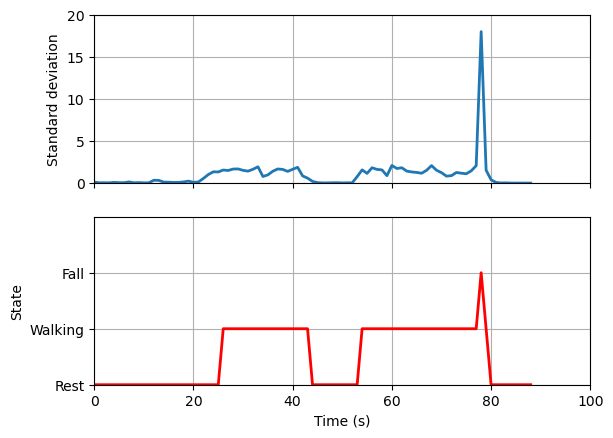

In [112]:
# First set up the figure, the axis, and the plot element we want to animate
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='r')
line = [line1, line2]

# initialization function: plot the background of each frame
def init():
    line[0].set_data([], [])
    line[1].set_data([], [])
    return line

ax1.set_ylim(0, 20)
ax1.set_xlim(0, 100)
ax1.set_ylabel('Standard deviation')
ax1.grid()

ax2.set_ylim(0, 3)
ax2.set_xlim(0, 100)
ax2.set_ylabel('State')
ax2.set_xlabel('Time (s)')
ax2.set_yticks([0, 1, 2])
ax2.set_yticklabels(['Rest', 'Walking', 'Fall'])
ax2.grid()

# animation function.  This is called sequentially
def animate(i):
    y = std[:i]
    t = time_values[:i]
    line[0].set_data(t, y)

    y2 = state_values[:i]
    line[1].set_data(t, y2)

    return line

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=1, blit=True)

# save the animation as an gif
anim.save('state.gif', fps=1)